In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Importing necessary Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix

In [28]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Yield/Farm data.csv')

In [29]:
df.head()

,Animal Number,Animal Name,"Dam, Official Reg. Number (ORN)",Sire Bull ID/ORN,Total Milk Yield (Kg),Corrected Milk (Kg),Length of Lactation,Days Dry (Days),Peak Yield (Kg),Days To Peak (Days)
0,806017,Bente,804195,L.Jet Bowser-ET,6116.56,8071.97,255,74,37.3,113
1,804528,RICO,802811,L.Jet Bowser XA,4692.00,6116.37,257,85,23.1,85
2,806100,Sumer,804387,L.Jet Bowser-ET,4905.57,6141.72,263,70,25.5,59
3,803991,Vacu155,3155,Brasilia,6927.00,8599.41,269,48,32.1,24
4,803570,Anjani,802132,L.Jet Bowser XA,8082.00,9518.55,269,53,35.4,61


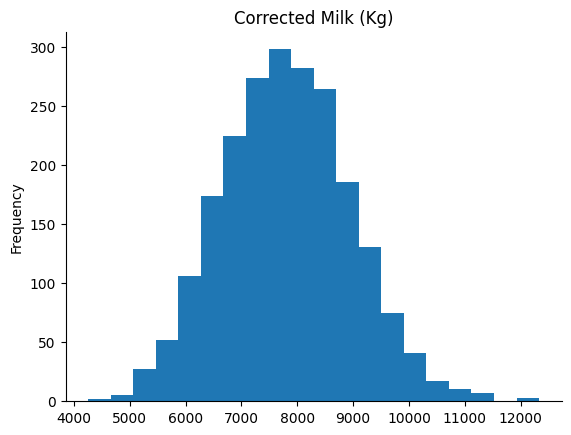

In [30]:
# @title Corrected Milk (Kg)

from matplotlib import pyplot as plt
df['Corrected Milk (Kg)'].plot(kind='hist', bins=20, title='Corrected Milk (Kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

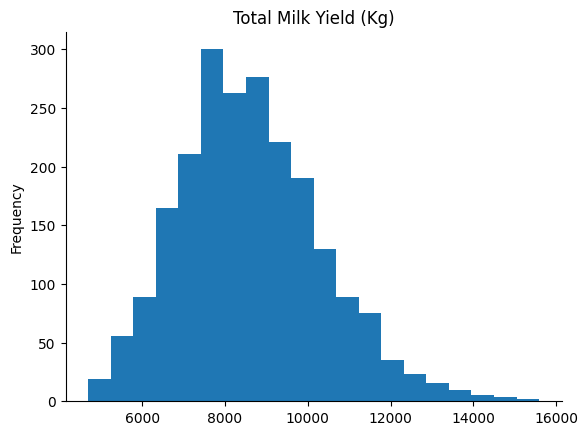

In [31]:
# @title Total Milk Yield (Kg)

from matplotlib import pyplot as plt
df['Total Milk Yield (Kg)'].plot(kind='hist', bins=20, title='Total Milk Yield (Kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
df.columns

Index(['Animal Number', 'Animal Name', 'Dam, Official Reg. Number (ORN)',
       'Sire Bull ID/ORN', 'Total Milk Yield (Kg)', 'Corrected Milk (Kg)',
       'Length of Lactation', 'Days Dry (Days)', 'Peak Yield (Kg)',
       'Days To Peak (Days)'],
      dtype='object')

In [33]:
# Select features for the model (excluding irrelevant columns)
features = ['Length of Lactation', 'Days Dry (Days)', 'Peak Yield (Kg)', 'Days To Peak (Days)']
target = 'Total Milk Yield (Kg)'

In [34]:
# Prepare data for modeling
X = df[features]
y = df[target]

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 924677.2810456766


In [38]:
threshold = np.median(y_test)  # Using median as the threshold
y_pred_discrete = np.where(y_pred > threshold, 1, 0)  # 1 for high, 0 for low
y_test_discrete = np.where(y_test > threshold, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(y_test_discrete, y_pred_discrete)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[184  34]
 [ 46 172]]


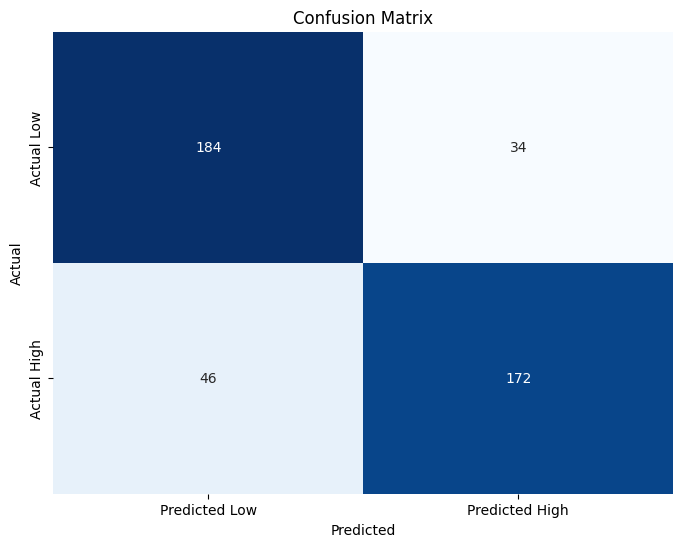

In [39]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import joblib

# Save the trained model to a file
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Yield/milk_yield_model.joblib')

['/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Yield/milk_yield_model.joblib']

## Prediction

In [42]:
# Load the saved model
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Yield/milk_yield_model.joblib')

# Sample input features for prediction
new_data = np.array([[150, 60, 35, 70]])

# Make predictions using the loaded model
predicted_yield = loaded_model.predict(new_data)

# Print the predicted milk yield
print("Predicted Total Milk Yield (Kg):", predicted_yield[0])

threshold = 2000 # Example threshold, replace with your actual threshold

predicted_class = 1 if predicted_yield[0] > threshold else 0

print(f"Predicted class: {predicted_class}")


Predicted Total Milk Yield (Kg): 3960.949276190204
Predicted class: 1
